In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')

In [2]:
path = '../data/'
da = pd.read_csv(path+'DataAnalyst.csv')
de = pd.read_csv(path+'DataEngineer.csv')
ds = pd.read_csv(path+'DataScientist.csv')
data = pd.concat([da, de, ds])

In [3]:
data = data.drop(columns=['index', 'Unnamed: 0'], axis=1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8690 entries, 0 to 3908
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          8690 non-null   object 
 1   Salary Estimate    8690 non-null   object 
 2   Job Description    8690 non-null   object 
 3   Rating             8690 non-null   float64
 4   Company Name       8689 non-null   object 
 5   Location           8690 non-null   object 
 6   Headquarters       8690 non-null   object 
 7   Size               8690 non-null   object 
 8   Founded            8690 non-null   int64  
 9   Type of ownership  8690 non-null   object 
 10  Industry           8690 non-null   object 
 11  Sector             8690 non-null   object 
 12  Revenue            8690 non-null   object 
 13  Competitors        8690 non-null   object 
 14  Easy Apply         8690 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 1.1+ MB


In [5]:
data[data['Company Name'].isna()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
1860,Data Analyst,$53K-$99K (Glassdoor est.),"Kindred at Home, part of the Kindred at Home f...",-1.0,NaN,"Mooresville, NC",-1,-1,-1,-1,-1,-1,-1,-1,-1


In [6]:
data = data.dropna()

In [7]:
data[data['Company Name'].isna()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply


### Job titles

##### Which positions have the most openings?

In [8]:
from collections import Counter
job_counts = Counter(data['Job Title'])

In [9]:
top_jobs = job_counts.most_common(10)

In [10]:
def plot_data_dict(title, counter):
    plt.figure()
    plt.barh(
        y=[item[0] for item in counter],
        width=[item[1] for item in counter])
    plt.title(title)
    plt.show()

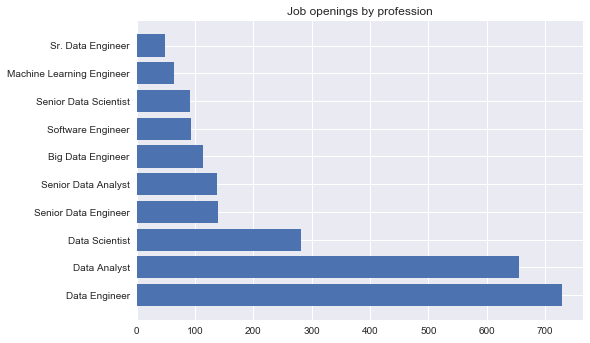

In [11]:
plot_data_dict('Job openings by profession', top_jobs)

##### Which sector has the most jobs available?

In [12]:
# A lot of rows had a -1 as sector, which probably stands for N/A
sector_count = Counter(data[data['Sector'] != '-1'].Sector)
top_secs = sector_count.most_common(10)

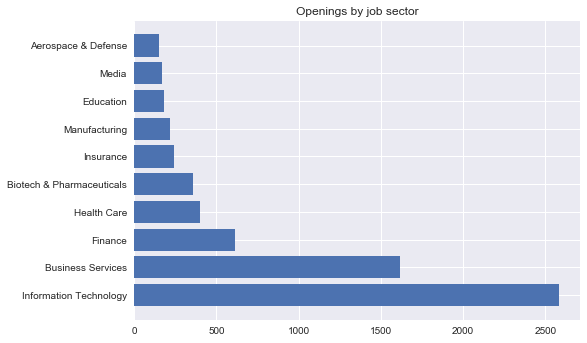

In [13]:
plot_data_dict('Openings by job sector', top_secs)

##### Which companies are posting the most jobs?

In [14]:
company_count = Counter(data['Company Name'])
top_co = company_count.most_common(10)

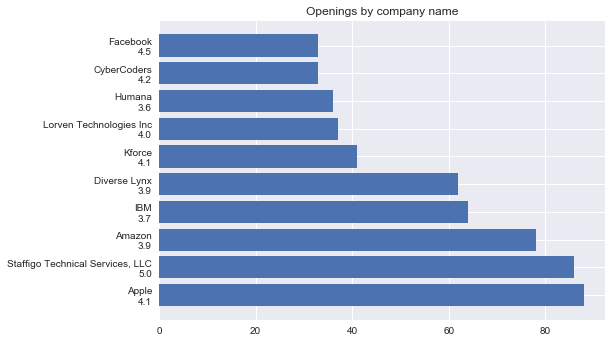

In [15]:
plot_data_dict('Openings by company name', top_co)

### Salary

##### Computing the average salary

In [16]:
data['Salary Estimate']

0        $37K-$66K (Glassdoor est.)
1        $37K-$66K (Glassdoor est.)
2        $37K-$66K (Glassdoor est.)
3        $37K-$66K (Glassdoor est.)
4        $37K-$66K (Glassdoor est.)
                   ...             
3904    $55K-$112K (Glassdoor est.)
3905    $55K-$112K (Glassdoor est.)
3906    $55K-$112K (Glassdoor est.)
3907    $55K-$112K (Glassdoor est.)
3908    $55K-$112K (Glassdoor est.)
Name: Salary Estimate, Length: 8689, dtype: object

In [17]:
def get_salary_pos(est, var):
    """ Return the minimum or maximum salary estimation, depending on the 
    
    @param pd.Series est: The Salary Estimate DataFrame column
    @param str var: 'max' or 'min'
    @rtype: func
    """
    assert var in ['max', 'min']
    pos = {'min': 0, 'max': 1}[var]
    clean_estimate_string = est.replace('(Glassdoor est.)', '').replace('(Employer est.)', '').replace('$', '').replace('K', '')
    estimate = clean_estimate_string.split('-')[pos]
    if 'Per Hour' in estimate: # fix hourly rate salaries
        return (int(estimate.replace('Per Hour', '')) * 52 * 40) / 1000
    return int(estimate)

In [18]:
data[data['Salary Estimate'] == '-1'] # This row was causing trouble below, dropping

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
2149,Configuration/Data Management Analyst III,-1,Job Description\nPosition Title: Configuration...,4.4,Protingent\n4.4,"Kent, WA","Bellevue, WA",51 to 200 employees,2001,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),-1,-1


In [19]:
data = data.drop([data.index[2148]])

In [20]:
data[data['Salary Estimate'] == '-1'] # This row was causing trouble below, dropping

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply


In [21]:
data['Min. Salary Est.'] = data['Salary Estimate'].map(lambda est: get_salary_pos(est, 'min'))
data['Max. Salary Est.'] = data['Salary Estimate'].map(lambda est: get_salary_pos(est, 'max'))

In [22]:
data['Avg. Salary Est.'] = data['Salary Estimate'].map(lambda est: (get_salary_pos(est, 'min') + get_salary_pos(est, 'max')) / 2)

In [23]:
data[['Min. Salary Est.', 'Avg. Salary Est.', 'Max. Salary Est.']].head()

,Min. Salary Est.,Avg. Salary Est.,Max. Salary Est.
0,37,51.5,66.0
1,37,51.5,66.0
2,37,51.5,66.0
3,37,51.5,66.0
4,37,51.5,66.0


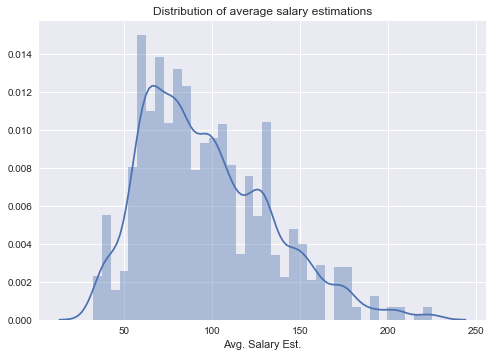

In [24]:
sns.distplot(data['Avg. Salary Est.'])
plt.title("Distribution of average salary estimations")
plt.show()

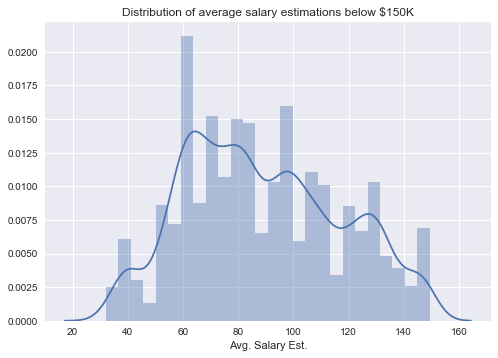

In [25]:
sns.distplot(data[data['Avg. Salary Est.'] < 150]['Avg. Salary Est.'])
plt.title("Distribution of average salary estimations below $150K")
plt.show()

##### Salary by profession

In [26]:
engineers = data[data['Job Title'].map(lambda title: 'Data Engineer' in title)]
analysts = data[data['Job Title'].map(lambda title: 'Data Analyst' in title)]
scientists = data[data['Job Title'].map(lambda title: 'Data Scientist' in title)]

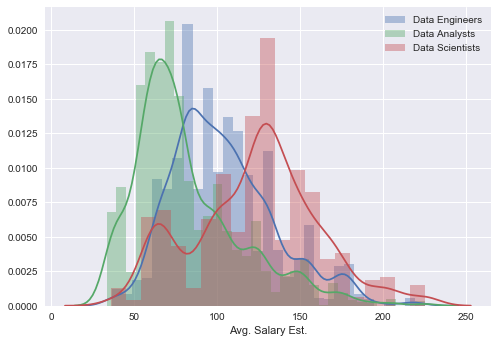

In [27]:
sns.distplot(engineers['Avg. Salary Est.'], label="Data Engineers")
sns.distplot(analysts['Avg. Salary Est.'], label="Data Analysts")
sns.distplot(scientists['Avg. Salary Est.'], label="Data Scientists")
plt.legend()
plt.show()

##### Salary by sector

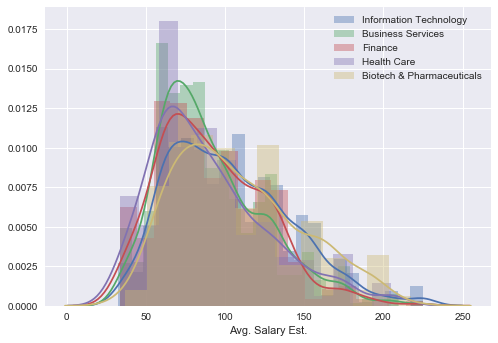

In [28]:
# reuse the sector count variable from above
top_5 = sector_count.most_common(5)
for sector in top_5:
    sector_data = data[data['Sector'] == sector[0]]
    sns.distplot(sector_data['Avg. Salary Est.'], label=sector)
plt.legend()
plt.show()

### Overall satisfaction

In [29]:
data['Rating']

0       3.2
1       3.8
2       3.4
3       4.1
4       3.9
       ... 
3904    4.4
3905    5.0
3906    3.8
3907    4.0
3908    3.7
Name: Rating, Length: 8686, dtype: float64

In [30]:
data[data['Rating'] == -1].shape[0]

914

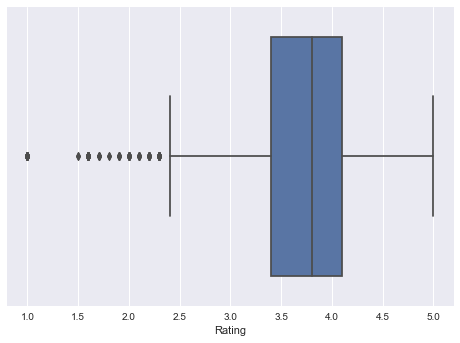

In [31]:
plt.figure()
sns.boxplot(data[data['Rating'] > -1].Rating)
plt.show()

### Location

##### Which states have the most openings?

In [32]:
count_loc = Counter(data.Location)
top_20 = count_loc.most_common(20)

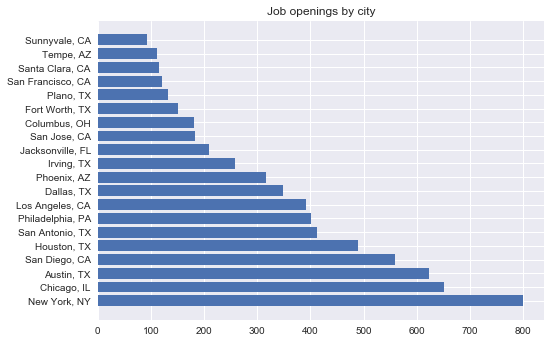

In [33]:
plot_data_dict('Job openings by city', top_20)

In [34]:
data['State']=data['Location'].map(lambda loc: loc.split(',')[1].strip())

In [35]:
count_states = Counter(data.State)
top_10 = count_states.most_common(10)

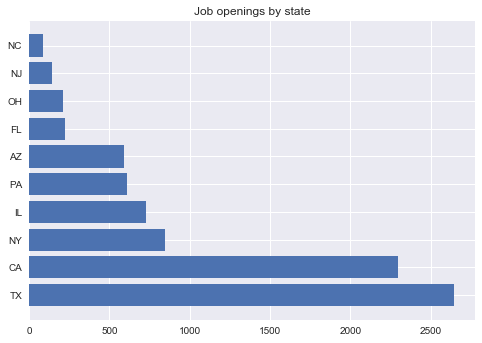

In [36]:
plot_data_dict('Job openings by state', top_10)

In [37]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap

In [38]:
jobs_by_state = pd.DataFrame()

In [39]:
jobs_by_state['State'] = pd.Series([item[0] for item in count_states.items()])
jobs_by_state['Jobs'] = pd.Series([item[1] for item in count_states.items()])

In [40]:
jobs_by_state = jobs_by_state.drop([jobs_by_state.index[20], jobs_by_state.index[19]])
jobs_by_state

,State,Jobs
0,NY,845
1,NJ,142
2,UT,33
3,CA,2294
4,VA,48
5,FL,224
6,IL,727
7,TX,2646
8,AZ,592
9,PA,611


In [41]:
max_amount = jobs_by_state.Jobs.max()
hmap = folium.Map(location=[45, -77], zoom_start=4)
hmap

In [43]:
states_coords = pd.read_csv(path+'states_coord.csv')
states_coords.head()

,state,latitude,longitude,name
0,AK,63.588753,-154.493062,Alaska
1,AL,32.318231,-86.902298,Alabama
2,AR,35.201050,-91.831833,Arkansas
3,AZ,34.048928,-111.093731,Arizona
4,CA,36.778261,-119.417932,California


In [44]:
def get_state_coords(state, df):
    row = df[df['state'] == state]
    return (row.latitude.to_numpy()[0], row.longitude.to_numpy()[0])

In [45]:
jobs_by_state['Latitude']=jobs_by_state['State'].map(lambda state: get_state_coords(state, states_coords)[0])
jobs_by_state['Longitude']=jobs_by_state['State'].map(lambda state: get_state_coords(state, states_coords)[1])

In [46]:
jobs_by_state

,State,Jobs,Latitude,Longitude
0,NY,845,43.299428,-74.217933
1,NJ,142,40.058324,-74.405661
2,UT,33,39.320980,-111.093731
3,CA,2294,36.778261,-119.417932
4,VA,48,37.431573,-78.656894
5,FL,224,27.664827,-81.515754
6,IL,727,40.633125,-89.398528
7,TX,2646,31.968599,-99.901813
8,AZ,592,34.048928,-111.093731
9,PA,611,41.203322,-77.194525


In [47]:
jobs_by_state['Jobs']=jobs_by_state['Jobs'].map(lambda x: float(x))
jobs_by_state['Latitude']=jobs_by_state['Latitude'].map(lambda x: float(x))
jobs_by_state['Longitude']=jobs_by_state['Longitude'].map(lambda x: float(x))
jobs_by_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      19 non-null     object 
 1   Jobs       19 non-null     float64
 2   Latitude   19 non-null     float64
 3   Longitude  19 non-null     float64
dtypes: float64(3), object(1)
memory usage: 760.0+ bytes


In [48]:
geo_data = list(zip(jobs_by_state.Latitude.values, 
                    jobs_by_state.Longitude.values, 
                    jobs_by_state.Jobs.values))

In [49]:
hm_wide = HeatMap(geo_data,
                  min_opacity=0.5, max_val=float(max_amount), radius=17, blur=15, 
                  max_zoom=5)

In [50]:
hmap.add_child(hm_wide)

In [51]:
def check_top_salary_dist(state_list, df, top_n):
    for state in state_list[:top_n]:
        state_data = df[df['State'] == state[0]]
        sns.distplot(state_data['Avg. Salary Est.'], label=state)
    plt.legend()
    plt.xticks(list(range(0, 250, 20)))
    plt.show()

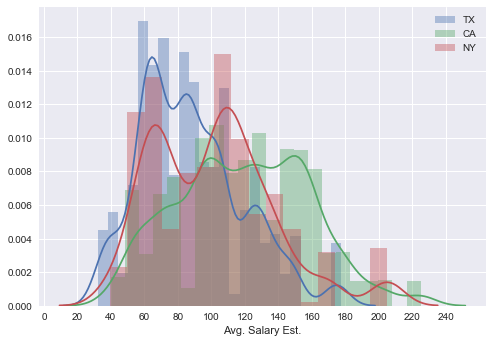

In [52]:
check_top_salary_dist(top_10, data, 3)

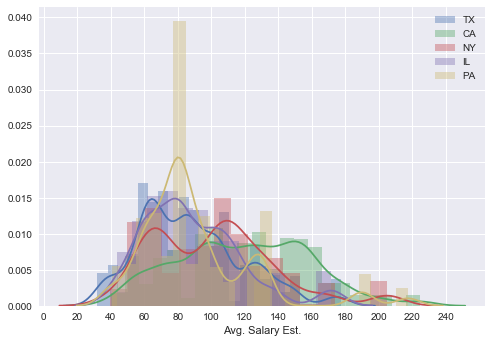

In [53]:
check_top_salary_dist(top_10, data, 5)

### Skills and job description

##### Required skills 

In [54]:
descs = data['Job Description']

In [55]:
curated_list = [
    ('python', 'python2.7', 'python3'),
    ('sql', 'mysql', 'postgresql', 'mssql', 'oracle'), 
    ('nosql', 'mongodb', 'couchdb', 'orientdb'),
    ('r', 'rstudio'), 
    'hadoop', 
    ('spark', 'pyspark'),
    ('scikit-learn', 'sklearn'),
    'tensorflow', 
    'keras', 
    'pytorch',
    ('mapreduce', 'map-reduce')
]

In [56]:
def find_skills(desc, skill_count):
    """
    Check the job description for any of our curated skills.
    Everytime one of them appears in a job description, record it.
    
    @param str desc: the job description
    @param dict skill_count: an external variable keeping track of the skills
    @rtype: None
    """
    for skill in curated_list:
        if type(skill) == str:
            if skill in desc.lower().split():
                skill_count[skill] = skill_count.setdefault(skill, 0) + 1
        elif type(skill) == tuple:
            if any(filter(lambda syn: syn in desc.lower().split(), skill)):
                skill_count[skill[0]] = skill_count.setdefault(skill[0], 0) + 1
    return

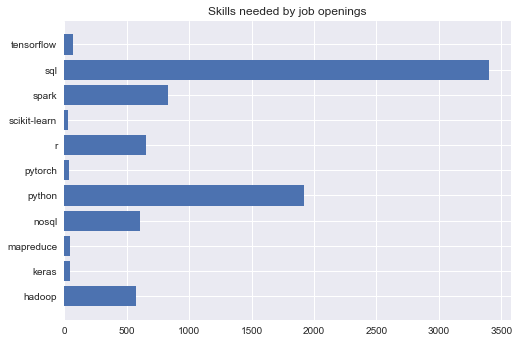

In [57]:
skill_count = {}
descs.map(lambda desc: find_skills(desc, skill_count))

# Plot the results
data_points = sorted(skill_count.items())
plot_data_dict("Skills needed by job openings", data_points)

##### What about the skills required for each position?

In [58]:
de_skill_count, da_skill_count, ds_skill_count = {}, {}, {}
labels = [item for item in curated_list if type(item) == str]\
        + [item[0] for item in curated_list if type(item) == tuple] 
for skill in labels:
    if type(skill) == str:
        de_skill_count[skill] = 0
        da_skill_count[skill] = 0
        ds_skill_count[skill] = 0
    else:
        de_skill_count[skill[0]] = 0
        da_skill_count[skill[0]] = 0
        ds_skill_count[skill[0]] = 0

In [59]:
_ = engineers['Job Description'].map(lambda desc: find_skills(desc, de_skill_count))
_ = analysts['Job Description'].map(lambda desc: find_skills(desc, da_skill_count))
_ = scientists['Job Description'].map(lambda desc: find_skills(desc, ds_skill_count))

In [60]:
def plot_stacked_bars(labels, width, title): 
    N = len(labels)
    da_data = tuple([item for item in da_skill_count.values()])
    de_data = tuple([item for item in de_skill_count.values()])
    ds_data = tuple([item for item in ds_skill_count.values()])

    ticks = np.arange(len(labels))

    da_plt = plt.bar(ticks, da_data, width)
    de_plt = plt.bar(ticks, de_data, width, bottom=da_data)
    ds_plt = plt.bar(ticks, ds_data, width, bottom=de_data)

    plt.ylabel('Number of occurences')
    plt.title(title)
    plt.xticks(ticks, labels, rotation=45)
    plt.legend((da_plt[0], de_plt[0], ds_plt[0]), ('Data Analysts', 'Data Engineers', 'Data Scientists'))

    plt.show()

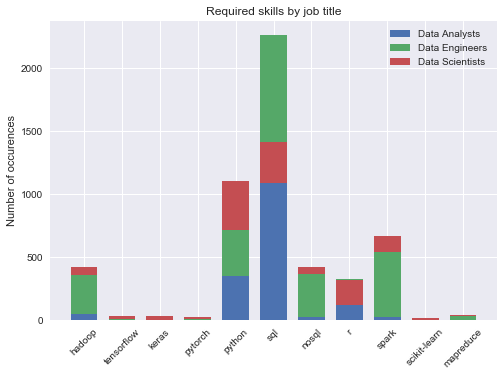

In [61]:
plot_stacked_bars(labels, 0.7, 'Required skills by job title')

In [62]:
labels.remove('python')
labels.remove('sql')

In [63]:
da_skill_count.pop('python')
de_skill_count.pop('python')
ds_skill_count.pop('python')

382

In [64]:
da_skill_count.pop('sql')
de_skill_count.pop('sql')
ds_skill_count.pop('sql')

330

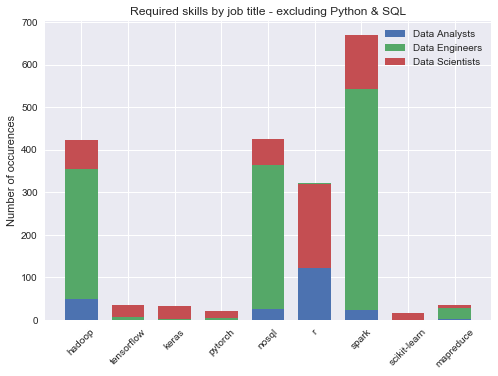

In [65]:
plot_stacked_bars(labels, 0.7, 'Required skills by job title - excluding Python & SQL')

##### Job description topic modelling

In [66]:
import re
import nltk
from nltk.stem import PorterStemmer
import wordcloud

In [67]:
def preprocess_desc(desc):
    
    # remove special characters
    desc = re.sub(r'[^a-zA-Z\s]', '', desc, re.I|re.A)
    
    # convert to lower case
    desc = desc.lower()
    
    # strip trailing whitespace
    desc = desc.strip()
    
    # tokenize description
    tokenizer = nltk.WordPunctTokenizer()
    tokens = tokenizer.tokenize(desc)
    
    # remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [tok for tok in tokens if not tok in stop_words]
    
    # stem job description
    ps = PorterStemmer()
    tokens = [ps.stem(tok) for tok in tokens]
    
    # join the tokens back, separated by a space
    desc = ' '.join(tokens)
    return desc

In [68]:
desc_tokens = data['Job Description'].map(lambda desc: preprocess_desc(desc))

In [69]:
desc_tokens

0       eager roll sleev har data drive polici chang e...
1       overview provid analyt technic support integr ...
2       look senior data analyst love mentorship data ...
3       requisit numberrr remotey collabor creat innov...
4       fanduel group fanduel group worldclass team br...
                              ...                        
3904    us tachyon technolog digit transform consult f...
3905    job descript interpret data analyz result use ...
3906    job descriptionth secur analyt data engin inte...
3907    secur analyt data engin interfac secur big dat...
3908    help us transform patient live ucb put heart s...
Name: Job Description, Length: 8686, dtype: object

In [77]:
import gensim
from gensim import corpora

from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV

In [78]:
X = np.array(list(desc_tokens))

In [81]:
tfidf = TfidfVectorizer(analyzer='word',       
                             min_df=10,
                             stop_words='english',             
                             lowercase=True,                   
                             token_pattern='[a-zA-Z0-9]{3,}',  
                             max_features=50000)

X = tfidf.fit_transform(X)

In [84]:
lda = LatentDirichletAllocation(batch_size=128, 
                                doc_topic_prior=None, 
                                evaluate_every=-1, 
                                learning_decay=0.7, 
                                learning_method='online', 
                                learning_offset=10.0,
                                max_doc_update_iter=100, 
                                max_iter=10, 
                                mean_change_tol=0.001,
                                n_components=10, 
                                n_jobs=-1, 
                                perp_tol=0.1,
                                random_state=100, 
                                topic_word_prior=None, 
                                total_samples=1000000.0, 
                                verbose=0)

In [86]:
lda.fit(X)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [87]:
print(lda)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)
